# Analyze the Feed axis data

### Q1 a81nxはどんな機械か？調査せよ / What kind of machine is a81nx? Investigate.
  - 横形マシニングセンタ
  - BT50主軸（特別仕様：HSK- A100）
  - 機体寸法：3710mm × 5605mm
  - パレット寸法：□630mm
  - 各軸最大移動量：(X, Y, Z) = (900, 900, 1020) mm
  - 主軸回転速度：20 ～ 10000 min<sup>-1</sup>

### Q2 X軸、Y軸、Z軸往復動作それぞれトルク平均値について、ヒストグラムを作成せよ<br>
Make a histogram for each of the X-axis, Y-axis, Z-axis. <br>
データ…C95_a81nx_WDAx02_TCMDA.csv

まずモジュールを読み込む

In [92]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

目的のCSVファイルをpandasのdataframe形式で読み込む

In [93]:
df_csv = pd.read_csv('C95_a81nx_WDAx02_TCMDA.csv', index_col=0)

pandasのdataframeの先頭5行を出力する

In [94]:
df_csv.head()

,SN,date,axis,scale,section,TCMD-A-1,TCMD-A-2
0,465,2017/11/25,X,1,2,5.401357,-5.077860
1,465,2017/11/25,Y,1,2,20.205510,13.520459
2,465,2017/11/25,Z,1,2,3.759887,-3.502716
3,475,2017/12/5,X,1,2,5.031119,-4.736860
4,475,2017/12/5,Y,1,2,15.270975,8.562764


ヒストグラムを作成する

In [121]:
df = pd.DataFrame({"x1": df_csv.iloc[0::3, 5],
                   "y1": df_csv.iloc[1::3, 5],
                   "z1": df_csv.iloc[2::3, 5],
                   "x2": df_csv.iloc[0::3, 6],
                   "y2": df_csv.iloc[1::3, 6],
                   "z2": df_csv.iloc[2::3, 6]})
df.head()

,x1,y1,z1,x2,y2,z2
0,5.401357,NaN,NaN,-5.07786,NaN,NaN
1,NaN,20.205510,NaN,NaN,13.520459,NaN
2,NaN,NaN,3.759887,NaN,NaN,-3.502716
3,5.031119,NaN,NaN,-4.73686,NaN,NaN
4,NaN,15.270975,NaN,NaN,8.562764,NaN


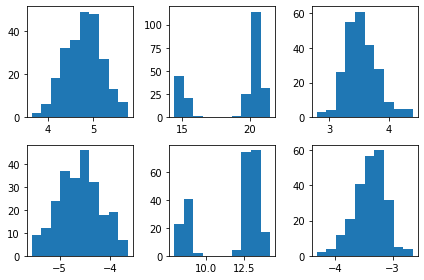

In [124]:
fig = plt.figure()

for i in range(1,7):
  fig.add_subplot(2, 3, i).hist(df.iloc[:,i-1])

plt.tight_layout()
plt.show()

### Q3　トルク平均値データについて分析せよ / Analyze the data of average value of the torque.